<a href="https://colab.research.google.com/github/rajeev-shivaram/PyTorch101/blob/master/Linear_Regression_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Declare a linear model and make basic predictions
### 2. Generate a dataset
### 3. Basic Linear model class
### 4. Custom Linear model
### 5. Use the dataset from Step2 into custom linear model from Step4 to do a first fit

In [0]:
import torch

### Declare a linear model and use it to make predictions.

In [0]:
# Equation of a straight line is 
m = torch.tensor(3.0, requires_grad=True)
c = torch.tensor(1.0, requires_grad=True)

# y = m*x + c

where m is slope, x is weight, c is the bias and y is the y-intercept or the point on y-axis where the line passes through.

We first start with a line which will not fit our data well, 
then use these data points to train a linear model to have an optimal weight
and bias values which provides us with optimal fit.

In [0]:
# to predict the values of y using x, define a forward function

def forward(x):
  y = m*x + c
  return y

In [4]:
x = torch.tensor(2)
forward(x)

x = torch.tensor([[4], [7]]) 
# since forward function accept only one parm, wrap it in list
forward(x)

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

### Create a dataset

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

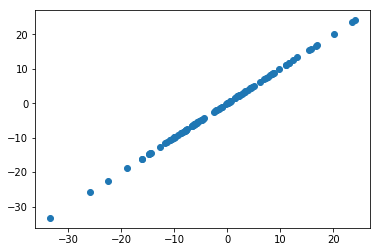

In [7]:
# return a tensor filled with random numbers that are normally distributed around zero
# also accepts a sequence of integers which then define the shape of tensor
# torch.randn(rows, column)

X = torch.randn(100, 1) * 10
y = X # creates a perfect linear model
plt.plot(X.numpy(), y.numpy(), 'o') # 'o' -> to show datapoint as circle

Text(0, 0.5, 'y')

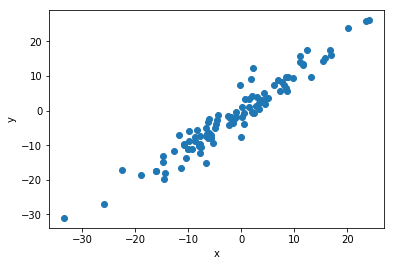

In [8]:
# to introduce some noise we'll add displacement to y
y = X + torch.randn(100, 1) * 3
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

### The Linear class

In [0]:
import torch
from torch.nn import Linear

set the seed, the reason for setting seed is because when constructing our model, linear class will be given random
we start with random value for weight and bias and then we train our model through gradient descent alog to find optimal parameters to fit our data

In [9]:

torch.manual_seed(1)

# for every prediction we make, for every output, there is one input
model = Linear(in_features=1, out_features=1)

print(model.bias, model.weight)
# this results in our equation being y = model.weight*x + model.bias

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [10]:
# make a prediction using an input x

x = torch.tensor([2.0])
# also
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


### Custom Model

In [0]:
import torch
import torch.nn as nn

In [0]:
class LR(nn.Module):
  """
  'Module' acts as a base class for all modules.
  Here, Linear regression will be a subclass of nn.Module
    thereby inherting nn as parent class
  """
  
  def __init__(self, input_size, output_size):
    '''
    Custome model requires an input and output just like 
    the Linear class.
    '''
    
    #this allows for more freedom in use of multiple inhertiance from parent classes
    super().__init__()
    
    # *** Upto this mark is boiler plate code ****
    
    # reps the instance of class object we intend to init
    self.linear = nn.Linear(input_size, output_size)
    
    # writing the forward method that makes predictions
  def forward(self, x):
    pred = self.linear(x)
    return pred


In [0]:
torch.manual_seed(1)

# init a new instance of your custom model
model = LR(1, 1)

In [14]:
# print the random weights and biased values that were assigned to it from nn.Linear
print(list(model.parameters()))

# (i)output depends on the output_size you have specified in model
# 0.5153 is the weight and -0.4414 is the bias

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [15]:
# recall that we use 'forward' to make predictions
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [16]:
# for multiple values
x = torch.tensor([[1.0], [3.0]])
print(model.forward(x))

tensor([[0.0739],
        [1.1044]], grad_fn=<AddmmBackward>)


### Use dataset for custom linear model

In [0]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    return self.linear(x)

In [3]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [4]:
# unpack the parameters
[w, b] = model.parameters()

# add .item to return them as python numbers rather than tensors
# w1 = w[0][0].item()
# b1 = b[0].item()
# print(w1, b1)
# cleaning up the above as
def get_params():
  return (w[0][0].item(), b[0].item())
get_params()

(0.5152631998062134, -0.44137823581695557)

In [0]:
def plot_fit(title):
  plt.title = title # setting the title
  w1, b1 = get_params()
  x1 = np.array([-30, 30]) # set the base range of plot
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r') # line plot
  plt.scatter(X, y) # dataset points as scatter plot
  plt.show()

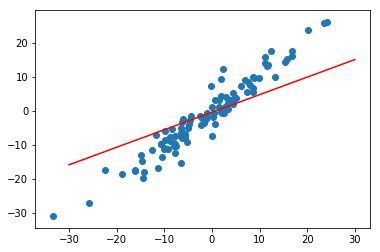

In [10]:
plot_fit('Init model')

The first fit line is not the best fit and this is corrected going forward using Gradient descent.

### Loss Function

Based on the above diagram, the initial line requires an optimization algo
that will adjust these params based on total error until we get a line with suitable params

consider a point (-3, 3) in the cartesian plane, since an infinite number of
lines having weight and bias can pass through this point.

But if we make the bias(the point where line crosses the y-plane) as zero and
and assume line passes through the center of the plane. we can calculate
the max distance between point and the line from the center.

we then try out different values for Loss = (y - ycap)^2 where ycap is the equation of line passing
through the center. hence the above equation reduces to 

(y - wx + b)^2
Since bias is zero

(y -wx)

since we have a point (-3, 3)

Loss = (3 - w(-3))

and by trying different values for w, we try to get the lowest possible value for Loss

### Gradient Descent

Now we know how to calculate loss function, we now now look into how to train a model
to determine the weight parameters which will minimize error function the most.

Here is where Gradient Descent comes into picture, the way GD works is we our linear model will begin with a set of random initial parameters, first ignoring bias, we want our line to move towards the direction which gave the smallest error with respect to the point.

GD = derivative (Loss function)

If we plot all the values we tried to minimize the loss function, we get a reverse bell graph where the mean is the point of minimum loss.

So we move along the negitive gradient of the bell graph,  which takes us in the direction of lowest error. We take the current weight and subtract the derivative of that function at the same point which takes us in the direction of least error.

In summary, we first compute the derivative of loss function, then substitute the current weight value  of the line. This gives us the gradient  value.

This gradient value is then subtracted from current weight to get the  new updated weight, the new weight should result in smaller error than previous one. We keep doing this iteratively untill we get a small error/optimal values for our linear model to fit the data.

While we are find the optimal value in small steps, we multiply gradient with a small number known as learning rate which is very important and a standard learning rate lies between 1 and 100. This learning rate controls unwanted divergent behaviour such as moving away from our optimal path

newWeight = oldWeight - learningRate * GD

### Mean Squared Error

Calculated in the same way as Loss Equation, but it also includes Bias since it also needs to be updated during the training process.

(y - wx + b)^2

Pytorch does this under the hood.

### Code:

In [0]:
import torch
import torch.nn as nn

In [0]:
# step1 is to Specift the loss function that we intent to minimize
# access the built-in loss funtion as 
criterion = nn.MSELoss()

# An optimizer that is used to update the parameters.
# usually a gradient descent optimizer, notibly Stochastic GD
# lr is learning rate and needs to be small
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)





the previous metioned GD is a batch GD which computes the gradient using the 
entire dataset by updating the weights based on the sum of accumulated errors.
This is not optimal when dealing with a million datapoints where accumulated 
error is evaluted for every single datapoint for every iteration.

Where as Stochastic GD minimizes the total loss one sample at a time
and reach convergence much faster as it frequently update the weights of model 
within the same sample size

now that we have set our configurations for training process, we train for certain epochs an epoch is a simple pass through dataset updating necessary values such as weight


epoch should be more since we dont want to underfit our data, the more epochs, the more number of times it passes throught the dataset updating its values

At the same time, we dont want to pass it so much it closely fits to a limited set of datapoints. i.e over-fitting.


In [18]:
epochs = 100
losses = [] 
for i in range(epochs):
  y_pred = model.forward(X)   # Get 1st prediction
  loss = criterion(y_pred, y) # MSE loss for predicted and actual y
  
  print("Epoch", i, "Loss:", loss.item())
  losses.append(loss)
  
  # set the gradient since it gets accumulates after backward call
  optimizer.zero_grad
  
  #minimize the loss, call GD of loss, for which we use backward func
  loss.backward() # computes gradient descent
  
  # now that we have GD, we update our model parameters using optimizers
  # all optims have step method thats used to update params of model
  optimizer.step()

Epoch 0 Loss: 602186973184.0
Epoch 1 Loss: 282654507008.0
Epoch 2 Loss: 711107018752.0
Epoch 3 Loss: 180593000448.0
Epoch 4 Loss: 804676829184.0
Epoch 5 Loss: 97013121024.0
Epoch 6 Loss: 876928958464.0
Epoch 7 Loss: 37245407232.0
Epoch 8 Loss: 923255570432.0
Epoch 9 Loss: 5101284352.0
Epoch 10 Loss: 940702564352.0
Epoch 11 Loss: 2630410496.0
Epoch 12 Loss: 928157597696.0
Epoch 13 Loss: 29990449152.0
Epoch 14 Loss: 886420471808.0
Epoch 15 Loss: 85436710912.0
Epoch 16 Loss: 818153062400.0
Epoch 17 Loss: 165433393152.0
Epoch 18 Loss: 727708205056.0
Epoch 19 Loss: 264878096384.0
Epoch 20 Loss: 620854444032.0
Epoch 21 Loss: 377429917696.0
Epoch 22 Loss: 504405950464.0
Epoch 23 Loss: 495910551552.0
Epoch 24 Loss: 385789231104.0
Epoch 25 Loss: 612764745728.0
Epoch 26 Loss: 272568451072.0
Epoch 27 Loss: 720540467200.0
Epoch 28 Loss: 171963777024.0
Epoch 29 Loss: 812363743232.0
Epoch 30 Loss: 90391298048.0
Epoch 31 Loss: 882379194368.0
Epoch 32 Loss: 33053351936.0
Epoch 33 Loss: 926122442752.0


1) We make predictions using our model.

2) Compare the predictions made by the model to the actual outputs and based on that determine the loss which is the means squared error

3) we then use an optimization algorithm, In our case stochastic gradient descent to update the weights of our model in the direction of the least error thereby minimizing the error function of our model as we attempt to minimize the loss iteratively to obtain a model with optimal parameters the model that best fits our data all right.

Text(0.5, 0, 'Epochs')

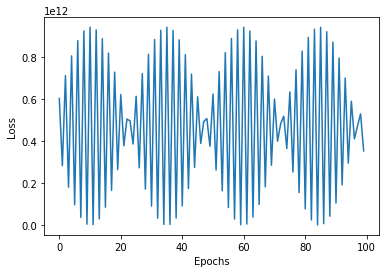

In [19]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')